In [1]:
import pandas as pd
import numpy as np
import json
from statsbombpy import sb
from mplsoccer import Pitch, Sbopen 
import matplotlib.pyplot as plt
import warnings
from pandas.errors import SettingWithCopyWarning
# Ignorer kun SettingWithCopyWarning
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

In [3]:
#Import xT Grid, turn it into an array, and then get how many rows and columns it has
xT = pd.read_csv(r"C:\Users\henri\Desktop\Fotballdata\xT_Grid.csv", header=None) 
#xT = np.array(xT)
#xT_rows, xT_cols = xT.shape

In [5]:
xT

0         1         2         3         4         5         6   \
0  0.006383  0.007796  0.008449  0.009777  0.011263  0.012483  0.014736   
1  0.007501  0.008786  0.009424  0.010595  0.012147  0.013845  0.016118   
2  0.008880  0.009777  0.010013  0.011105  0.012692  0.014291  0.016856   
3  0.009411  0.010827  0.010165  0.011324  0.012626  0.014846  0.016895   
4  0.009411  0.010827  0.010165  0.011324  0.012626  0.014846  0.016895   
5  0.008880  0.009777  0.010013  0.011105  0.012692  0.014291  0.016856   
6  0.007501  0.008786  0.009424  0.010595  0.012147  0.013845  0.016118   
7  0.006383  0.007796  0.008449  0.009777  0.011263  0.012483  0.014736   

         7         8         9         10        11  
0  0.017451  0.021221  0.027563  0.034851  0.037926  
1  0.018703  0.024015  0.029533  0.040670  0.046477  
2  0.019351  0.024122  0.028552  0.054911  0.064426  
3  0.019971  0.023851  0.035113  0.108051  0.257454  
4  0.019971  0.023851  0.035113  0.108051  0.257454  
5  0.019351  0.024122  0.028552  0.054911  0.064426  
6  0.018703  0.024015  0.029533  0.040670  0.046477  
7  0.017451  0.021221  0.027563  0.034851  0.037926

In [7]:
print(xT)
print(xT.shape)
print(type(xT))

         0         1         2         3         4         5         6   \
0  0.006383  0.007796  0.008449  0.009777  0.011263  0.012483  0.014736   
1  0.007501  0.008786  0.009424  0.010595  0.012147  0.013845  0.016118   
2  0.008880  0.009777  0.010013  0.011105  0.012692  0.014291  0.016856   
3  0.009411  0.010827  0.010165  0.011324  0.012626  0.014846  0.016895   
4  0.009411  0.010827  0.010165  0.011324  0.012626  0.014846  0.016895   
5  0.008880  0.009777  0.010013  0.011105  0.012692  0.014291  0.016856   
6  0.007501  0.008786  0.009424  0.010595  0.012147  0.013845  0.016118   
7  0.006383  0.007796  0.008449  0.009777  0.011263  0.012483  0.014736   

         7         8         9         10        11  
0  0.017451  0.021221  0.027563  0.034851  0.037926  
1  0.018703  0.024015  0.029533  0.040670  0.046477  
2  0.019351  0.024122  0.028552  0.054911  0.064426  
3  0.019971  0.023851  0.035113  0.108051  0.257454  
4  0.019971  0.023851  0.035113  0.108051  0.257454  


In [9]:
xT_array = xT.to_numpy()

In [11]:
print(xT_array.shape)  
print(type(xT_array))

(8, 12)
<class 'numpy.ndarray'>


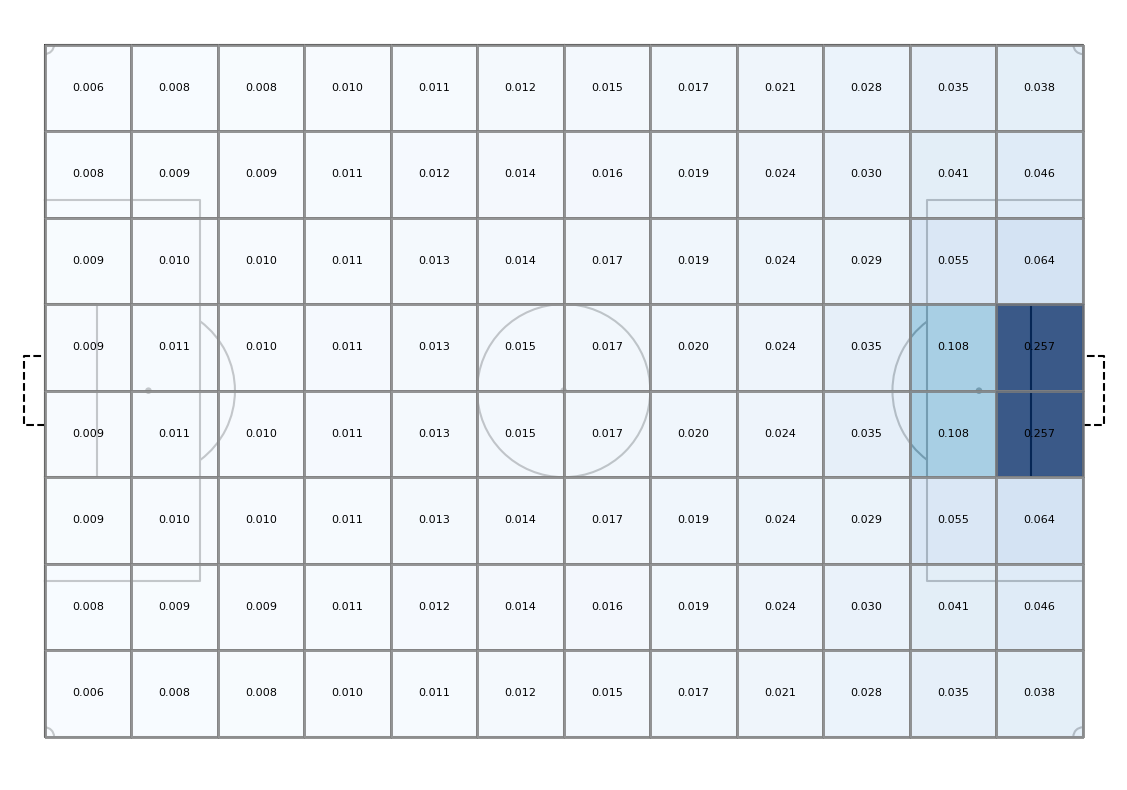

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch

pitch = Pitch(
    pitch_type='statsbomb', 
    axis=False, 
    label=False, 
    line_color='black', 
    pad_bottom=5,
    spot_type='circle', spot_scale=0.0025, 
    linewidth=1.5, linestyle='-', 
    goal_type='box', goal_alpha=1,
    corner_arcs=True, line_alpha=1, 
    goal_linestyle='--', 
    half=False
)
fig, ax = pitch.draw(figsize=(13, 8))
fig.patch.set_facecolor('white')  # Endrer figurens bakgrunn
ax.set_facecolor('white')         # Endrer aksens bakgrunn


# Opprett dictionaryen stats
n_rows, n_cols = xT_array.shape  # (8, 12)
x_grid = np.linspace(0, 120, n_cols+1)  # 13 punkter
y_grid = np.linspace(0, 80, n_rows+1)   # 9 punkter

stats = {
    'statistic': xT_array,
    'x_grid': x_grid,
    'y_grid': y_grid
}

# Plot varmekartet ved å sende stats-ordboka
hm = pitch.heatmap(stats, ax=ax, cmap='Blues', alpha=0.8, edgecolor='grey')

# Annoter tekst i midten av hver bin (som før)
x_centers = (x_grid[:-1] + x_grid[1:]) / 2
y_centers = (y_grid[:-1] + y_grid[1:]) / 2

for i in range(n_rows):
    for j in range(n_cols):
        pitch.annotate(
            f"{xT_array[i, j]:.3f}",
            xy=(x_centers[j], y_centers[i]),
            ax=ax,
            ha='center', 
            va='center',
            color='black',
            fontsize=8
        )

plt.show()
fig.savefig(r"C:\Users\henri\Desktop\Fotballanalyser\Expected threat\xT-article.jpg", dpi=400,bbox_inches="tight")